<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Thedin-Bandara/sarima_jumper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SAFRIMA
#Seasonal AutoRegressive Fractionally Integrated Moving Average

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
from google.colab import drive

In [7]:
# Mounting the Google Drive
drive.mount('/content/drive')

# Reading the data from the excel file and removing blank spaces in each cell
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Specify the file path
!ls -l $file_path
file_path = 'preprocessed_data_new.xlsx'

data = pd.read_excel(file_path)

BadZipFile: File is not a zip file

In [9]:
# Define a mapping of sub-departments to main departments
sub_dept_to_main_dept = {
    'Jumper Team': [sub_dept for sub_dept in data['Department'] if sub_dept.startswith('Jumper Team')]

}


# Map each sub-department to its main department
main_dept_for_sub_dept = {}
for main_dept, sub_depts in sub_dept_to_main_dept.items():
    for sub_dept in sub_depts:
        main_dept_for_sub_dept[sub_dept] = main_dept

# Add a new column indicating the main department for each row
data['MainDepartment'] = data['Department'].map(main_dept_for_sub_dept)


In [10]:
#main department all leaves
leave_days_by_month = data.groupby(['LeaveYear', 'LeaveMonth', 'MainDepartment']).size().reset_index(name='TotalLeaveDays')
print(leave_days_by_month)

    LeaveYear  LeaveMonth MainDepartment  TotalLeaveDays
0        2021          12    Jumper Team             111
1        2022           1    Jumper Team              91
2        2022           2    Jumper Team             131
3        2022           3    Jumper Team             188
4        2022           4    Jumper Team             120
5        2022           5    Jumper Team             189
6        2022           6    Jumper Team             151
7        2022           7    Jumper Team             114
8        2022           8    Jumper Team             135
9        2022           9    Jumper Team             131
10       2022          10    Jumper Team             142
11       2022          11    Jumper Team             136
12       2022          12    Jumper Team              96
13       2023           1    Jumper Team             102
14       2023           2    Jumper Team              81
15       2023           3    Jumper Team             107
16       2023           4    Ju

ADF Statistic: -1.2660295708242042
p-value: 0.6445670445764196
Critical Values:
   1%: -3.7529275211638033
   5%: -2.998499866852963
   10%: -2.6389669754253307


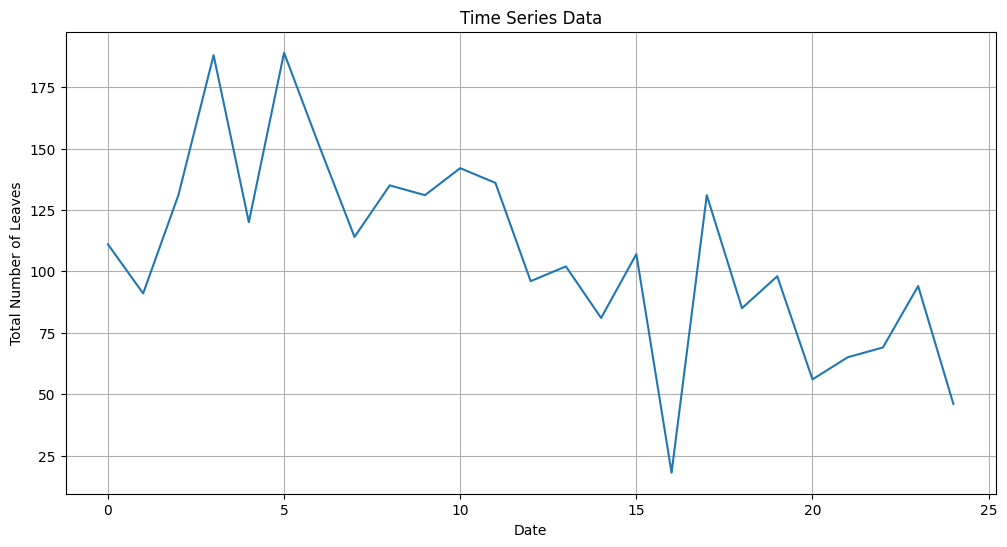

In [11]:
def adf_test(timeseries):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

adf_test(leave_days_by_month['TotalLeaveDays'])

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(leave_days_by_month['TotalLeaveDays'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total Number of Leaves')
plt.grid(True)
plt.show()

In [19]:
# Step 3: Split Data
train_size = int(len(leave_days_by_month) * 0.9)
train_data, test_data = leave_days_by_month['TotalLeaveDays'][:train_size], leave_days_by_month['TotalLeaveDays'][train_size:]


In [20]:
train_data.head()

0    111
1     91
2    131
3    188
4    120
Name: TotalLeaveDays, dtype: int64

In [27]:
# Step 4: Build and Train SARFIMA Model
order = (3, 1, 1)  # Example SARIMA parameters (p, d, q)
seasonal_order = (0, 0, 0, 12)  # Example seasonal parameters (P, D, Q, S)
sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, trend='c', enforce_stationarity=False)
trained_model = sarima_model.fit()

22    56.716397
23    52.670042
24    46.944927
Name: predicted_mean, dtype: float64
Mean Squared Error: 619.9817223543855
Root Mean Squared Error (RMSE): 24.89943216931634


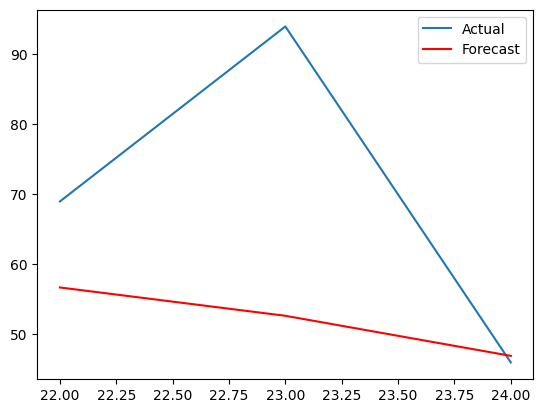

In [28]:
# Step 5: Validate Model
forecast = trained_model.forecast(steps=3)
print(forecast)
# Step 6: Evaluate Model
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize Results
plt.plot(test_data, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.show()